## Import libraries

In [177]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

## Use the GPU for training if possible

In [178]:
devices = tf.config.experimental.list_physical_devices("GPU")
if len(devices) > 0:
    tf.config.experimental.set_memory_growth(devices[0], enable=True)

## General functions

In [179]:
# normalize the dataset
def normalize_data(data):
    return data.astype('float32') / 255.

In [180]:
def plot_sample(images, labels, header):
    n = images.shape[0]
    plt.figure(figsize=(20, 4))
    plt.title(f"{header}")
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.title(f'{labels[i]}')
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [181]:
def add_noise(data, _noise_factor = 0.4):
    noisy_data = data + _noise_factor * tf.random.normal(shape=data.shape)
    return tf.clip_by_value(noisy_data, clip_value_min=0., clip_value_max=1.)

In [182]:
def visualize_images(_data, _labels, _rows = 2, _columns = 8):
    fig, axes = plt.subplots(_rows, _columns, figsize = (12, 3))

    for i in range(_rows):
        for j in range(_columns):
            # calculate the index of the current element and print the picture
            cnt = i * _columns + j
            axes[i,j].imshow(_data[cnt], cmap= 'gray')
            axes[i,j].set_title(f'{_labels[cnt]}')

In [183]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

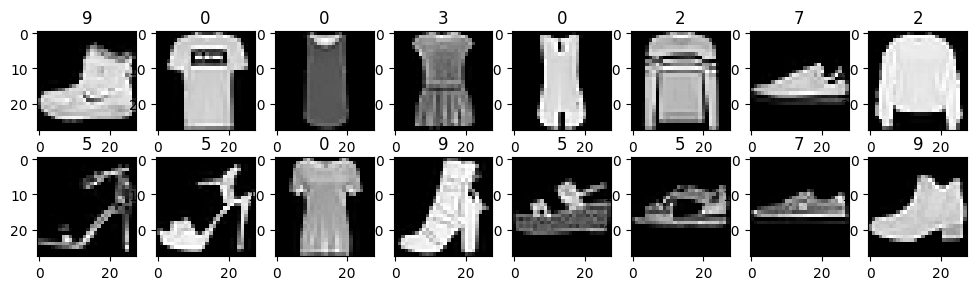

In [184]:
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
visualize_images(x_train, y_train)

In [185]:
x_train = normalize_data(x_train)
x_test = normalize_data(x_test)

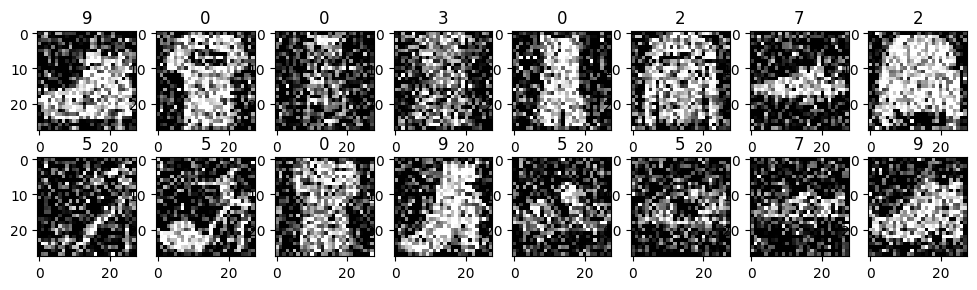

In [186]:
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)
visualize_images(x_train_noisy, y_train)

In [187]:
autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [188]:
history = autoencoder.fit(x_train_noisy, x_train,
                          batch_size=128,
                          epochs=10,
                          shuffle=True,
                          validation_split=0.10,
                          validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - loss: 0.0514 - val_loss: 0.0166
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.0160 - val_loss: 0.0150
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 0.0147 - val_loss: 0.0141
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 0.0140 - val_loss: 0.0137
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 0.0135 - val_loss: 0.0133
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - loss: 0.0133 - val_loss: 0.0131
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - loss: 0.0131 - val_loss: 0.0130
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - loss: 0.0129 - val_loss: 0.0128
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - loss: 0.0128 - val_loss: 0.0127
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - loss: 0.0126 - val_loss: 0.0126


In [189]:
print(f'{autoencoder.summary()}')
print('---------------------------------')
print(f'{autoencoder.encoder.summary()}')
print('---------------------------------')
print(f'{autoencoder.decoder.summary()}')

Model: "denoise_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)      │ (None, 7, 7, 32)       │         9,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_15 (Sequential)      │ (None, 28, 28, 1)      │        18,785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,061 (332.27 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 56,708 (221.52 KB)

None
---------------------------------


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 7, 7, 32)       │         9,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,568 (37.38 KB)

 Trainable params: 9,568 (37.38 KB)

 Non-trainable params: 0 (0.00 B)

None
---------------------------------


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose_14             │ (None, 14, 14, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_15             │ (None, 28, 28, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,785 (73.38 KB)

 Trainable params: 18,785 (73.38 KB)

 Non-trainable params: 0 (0.00 B)

None


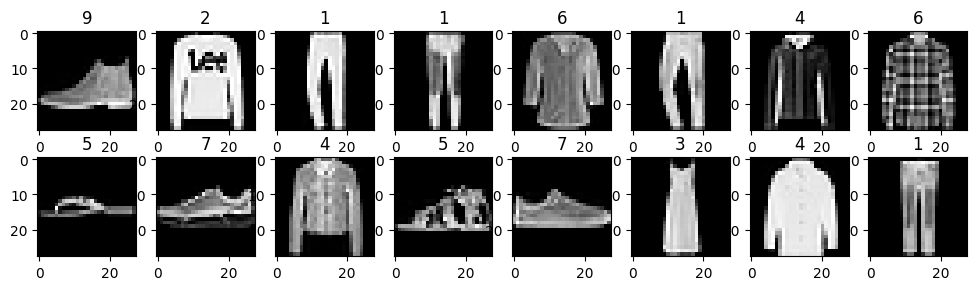

In [190]:
visualize_images(x_test, y_test)

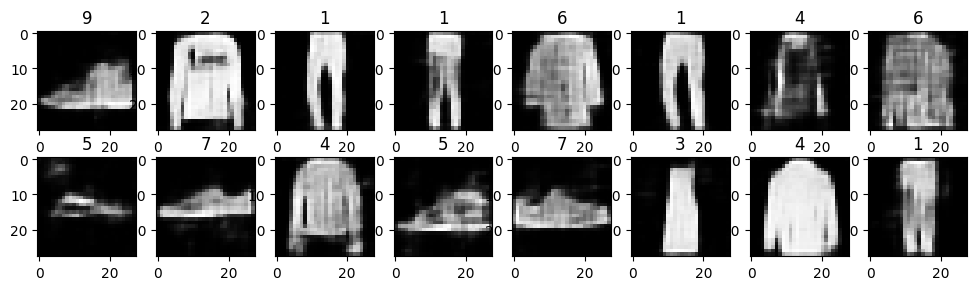

In [191]:
encoded_images = autoencoder.encoder(x_test_noisy).numpy()
decoded_images = autoencoder.decoder(encoded_images).numpy()
visualize_images(decoded_images, y_test)

## Loss function

Let's print a loss function to get the training and validation loss.

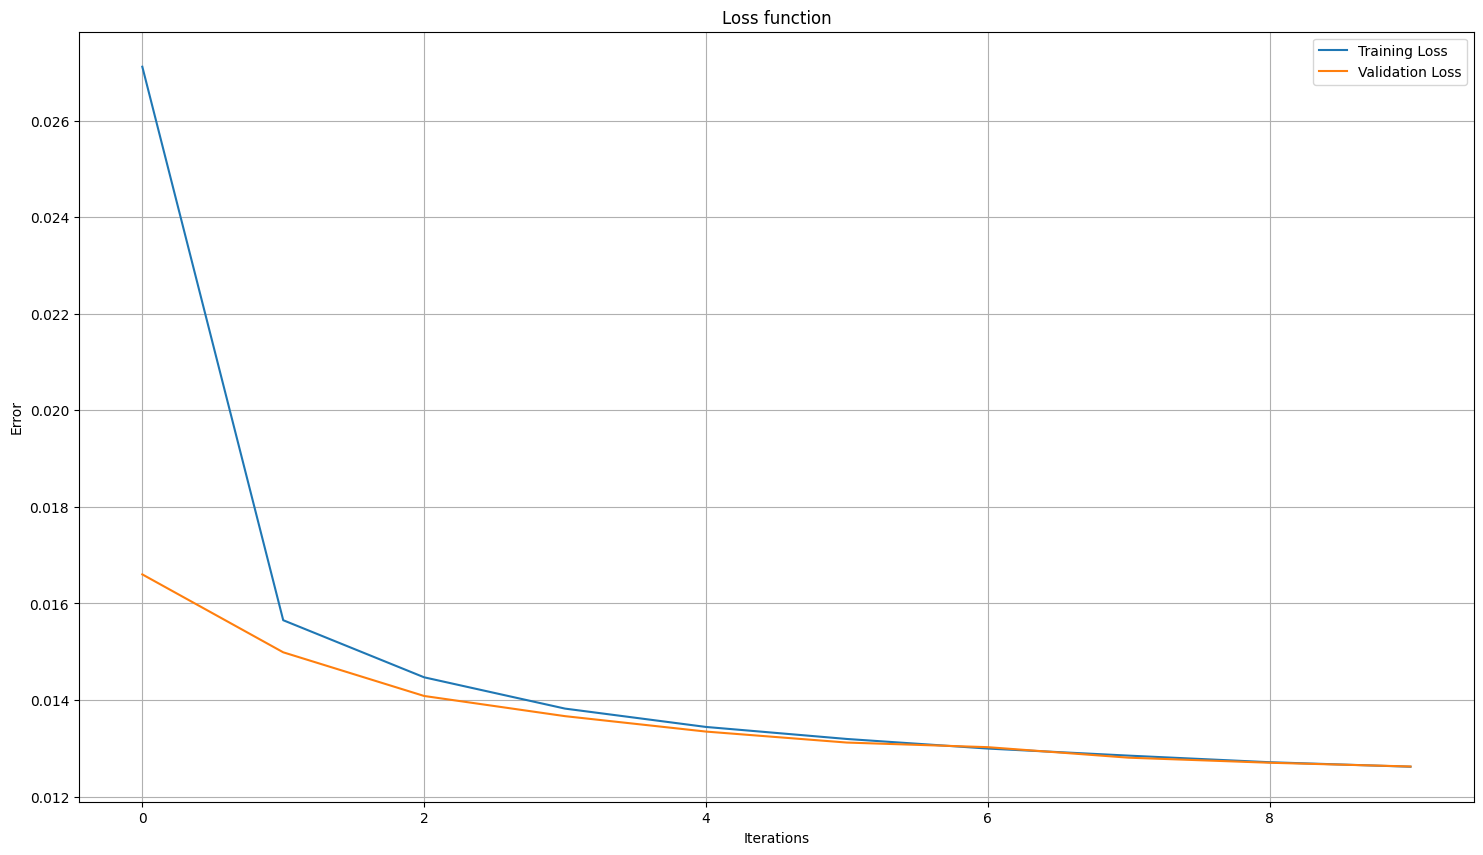

In [192]:
plt.figure(figsize=(18,10))
plt.title("Loss function")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()